In [5]:

import sys

#Quick fudge to make import from ../Scripts work
sys.path.append('../Scripts')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



In [6]:
MSSFRnameslist = []
MSSFRnameslist.append('000') # add phenomenological 

for ind_SFR, SFR in enumerate(SFRs):
	ind_x = ind_SFR+1
	for ind_GSMF, GSMF in enumerate(GSMFs):
		ind_y = ind_GSMF + 1
		for ind_MZ, MZ in enumerate(MZs):
			ind_z = ind_MZ +1

			MSSFRnameslist.append('%s%s%s'%(ind_x, ind_y, ind_z))

            
MSSFRnameslistCSV = ['.0.0.0', '.1.1.1', '.1.1.2', '.1.1.3', '.1.2.1', '.1.2.2', '.1.2.3', '.1.3.1', '.1.3.2', '.1.3.3', '.2.1.1', '.2.1.2', '.2.1.3', '.2.2.1', '.2.2.2', '.2.2.3', '.2.3.1', '.2.3.2', '.2.3.3', '.3.1.1', '.3.1.2', '.3.1.3', '.3.2.1', '.3.2.2', '.3.2.3', '.3.3.1', '.3.3.2', '.3.3.3']

MSSFRnameslist = []
MSSFRnameslist.append('000') # add phenomenological 

for ind_SFR, SFR in enumerate(SFRs):
	ind_x = ind_SFR+1
	for ind_GSMF, GSMF in enumerate(GSMFs):
		ind_y = ind_GSMF + 1
		for ind_MZ, MZ in enumerate(MZs):
			ind_z = ind_MZ +1

			MSSFRnameslist.append('%s%s%s'%(ind_x, ind_y, ind_z))
            
           
print('obtain index of the SFRD models that we want to highlight')
print('-----')
MSSFRnameslistCSV = ['.0.0.0', '.1.1.1', '.1.1.2', '.1.1.3', '.1.2.1', '.1.2.2', '.1.2.3', '.1.3.1', '.1.3.2', '.1.3.3', '.2.1.1', '.2.1.2', '.2.1.3', '.2.2.1', '.2.2.2', '.2.2.3', '.2.3.1', '.2.3.2', '.2.3.3', '.3.1.1', '.3.1.2', '.3.1.3', '.3.2.1', '.3.2.2', '.3.2.3', '.3.3.1', '.3.3.2', '.3.3.3']
for ind_SFRD, SFRD in enumerate(MSSFRnameslistCSV):
    if SFRD in ['.0.0.0', '.2.3.1', '.3.1.2']:
        print(ind_SFRD, SFRD, (MSSFRnameslist[ind_SFRD]))
        print()
        
MSSFRheaderDict =  {'000':'.0.0.0', '111':'.1.1.1', '112':'.1.1.2', '113':'.1.1.3', '121':'.1.2.1', '122':'.1.2.2', '123':'.1.2.3', '131':'.1.3.1', '132':'.1.3.2', '133':'.1.3.3', '211':'.2.1.1',\
                    '212':'.2.1.2', '213':'.2.1.3', '221':'.2.2.1', '222':'.2.2.2', '223':'.2.2.3', '231':'.2.3.1', '232':'.2.3.2', '233':'.2.3.3', '311':'.3.1.1', '312':'.3.1.2', '313':'.3.1.3', '321':'.3.2.1', \
                    '322':'.3.2.2', '323':'.3.2.3', '331':'.3.3.1', '332':'.3.3.2', '333':'.3.3.3'}    


obtain index of the SFRD models that we want to highlight
-----
0 .0.0.0 000

16 .2.3.1 231

20 .3.1.2 312



In [11]:
markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P", "X", "+", "d"]
dictMarkerShape = {BPSnameslist[i]: markershapes[i] for i in range(len(BPSnameslist))}

def plotScatterMRR_spins(axe=None, whichRate='intrinsic', ylims=[0,1], spin_threshold=0.05):



    channelColorDict = {'LVKM1 spinning':'mediumseagreen', 'LVKM2 spinning':'crimson', 'All one spinning':'darkgray'}
    List_formationchannelOptions = ['All', 'All one spinning', 'LVKM1 spinning',  'LVKM2 spinning']
    ind_formationchannelOptions = [0,1,2,3]
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    
    
    csvPath = '/Users/floorbroekgaarden/Projects/GitHub/MRR_Project/dataFiles/rates_MSSFR_Models_BHBH_MRR_Spins.csv' 
    if spin_threshold!=0.05:
        stringgg =  'MRR_Spins' +  '_threshold_%s_'%spin_threshold
        csvPath = '/Users/floorbroekgaarden/Projects/GitHub/MRR_Project/dataFiles/rates_MSSFR_Models_'+'BHBH'+ '_' + stringgg + '.csv'

        
        
        
    df = pd.read_csv(csvPath, index_col=0).T
    
#     for ind_c, whichSpin in enumerate(['LVKM1 spinning',  'LVKM2 spinning']):

    for ind_L, MSSFRname in enumerate(MSSFRnameslist):
        key_mssfr = MSSFRheaderDict[MSSFRname]
        rates_L = df[key_mssfr]
        
        if whichRate =='intrinsic':
            ylabel =  r'$\textbf{Fraction} \  \chi_{\rm{i}}>%s $'%spin_threshold # \ \rm{f}_{\chi}^{0}
            text_legend = r'\textbf{a) intrinsic population}'
             
            totalrates = np.asarray(rates_L[0::8][0:nModels])
            fraction_spin = np.asarray(rates_L[2::8][0:nModels]) / totalrates
            fraction_LVKM1_spinning = (np.asarray(rates_L[4::8][0:nModels])/totalrates) / fraction_spin
            fraction_LVKM2_spinning = (np.asarray(rates_L[6::8][0:nModels])/totalrates) / fraction_spin
            
            
            

        elif whichRate=='observed':
            ylabel = r'$\textbf{Fraction} \  \chi_{\rm{i}}>%s $'%spin_threshold #\ \rm{f}_{\chi}^{\rm{det}}
            text_legend = r'\textbf{b) detectable population}' 
            
            totalrates = np.asarray(rates_L[1::8][0:nModels])
            fraction_spin = np.asarray(rates_L[3::8][0:nModels]) / totalrates
            fraction_LVKM1_spinning = (np.asarray(rates_L[5::8][0:nModels])/ totalrates) / fraction_spin
            fraction_LVKM2_spinning = (np.asarray(rates_L[7::8][0:nModels])/ totalrates) / fraction_spin      



        
        for ind_BPS, BPS_name in enumerate(BPSnameslist):

            color_BPS = 'gray'
            zorder=3
            if BPS_name in ['A','B', 'J', 'K', 'R']:
                color_BPS = [colorDirDict[BPS_name]]
                zorder=10
            
            axe.scatter(fraction_LVKM2_spinning[ind_BPS], fraction_spin[ind_BPS], c=color_BPS,\
                        s=150, label=None, zorder=zorder, alpha=1, marker=markershapes[ind_BPS]) #c=BPScolors
        

    
    # plot a line for the 50% 
    xx_half = [0.5, 0.5]
    yy_half = [0,1]
#     axe.plot(xx_half, yy_half, lw=4, linestyle=':', zorder=3, color='deepskyblue')
    
    
    
    if whichRate=='observed':
        # add the 90% credible interval from Galaudage (lambda_0 from https://iopscience.iop.org/article/10.3847/2041-8213/ac2f3c)
        xx_obs = np.linspace(0,1, 2)
        yy_galaudage21_bottom, yy_galaudage21_top = [0.1, 0.1], [0.31, 0.31]
        median_galaudage21 = [0.19, 0.19]

        axe.plot(xx_obs, median_galaudage21, lw=3, color='gray', zorder=2, alpha=0.8)
        axe.fill_between(xx_obs, yy_galaudage21_bottom, yy_galaudage21_top, color='lightgray', alpha=0.5, zorder=1)
#         axe.text(s=r'$90\%$ \textbf{credible interval Galaudage et al. (2021)}', x=0.005, y=0.309, fontsize=14, ha='left', va='top', rotation=90)
        axe.text(s=r'\textbf{Galaudage et al. (2021)}', x=0.007, y=0.31, fontsize=13, ha='left', va='top', rotation=90, color='gray')
    
    axe.text(s=text_legend, x=0.03, y=0.975, fontsize=24, ha='left', va='top', rotation=0, transform=axe.transAxes)

#     for ll in [0.1, 0.2, 0.3, 0.4, 0.5]:
#         axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
    xmin, xmax = 0,1
    axe.set_ylim(ylims[0], ylims[1] )
    axe.set_xlim(xmin, xmax)
    axe.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    axe.set_xticklabels([r'$0\%$',r'$20\%$',r'$40\%$', r'$60\%$', r'$80\%$', r'$100\%$'], fontsize=20, rotation=0)#, orientation=30)  
    
    xlabel = r'$\textbf{Percentage} \ m_2 \ \textbf{spinning} \ (\chi_{2}>0.05; \ \textbf{non-MRR})$'
    axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False, fontsize=22)
    axe.grid(True)

    
    ax2y = axe.twiny()
    ax2y.set_xlim(xmin, xmax)
    ax2y.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax2y.set_xticklabels([r'$100\%$', r'$80\%$', r'$60\%$',r'$40\%$',r'$20\%$',r'$0\%$'], fontsize=20, rotation=0)#, orientation=30)  
    xlabel = r'$\textbf{Percentage} \ m_1 \ \textbf{spinning} \ (\chi_{1}>0.05; \ \textbf{MRR})$'
    layoutAxes(ax2y, nameX=xlabel, nameY=xlabel, setMinor=False, fontsize=22, second=True, labelpad=15)

    


    return axe


def plot_legend_scatterFigure(axe='None'):
    
        


    color_BPS = 'gray'
    zorder=3
    
    xx_=np.linspace(-100, -90, 10)
    
    
    
    for BPS_name in ['A','B', 'J', 'K', 'R', 'X']:
        if BPS_name=='X':
            # we want to plot a gray square for the legend to indicate all other models
            color_BPS='gray'
            lb = r'\textbf{other models}'
            marker='s'
        else:
            color_BPS = [colorDirDict[BPS_name]]
            lb = r'\textbf{model %s: }'%BPS_name + alphabetPhysicalNameDict[BPS_name]
            marker=dictMarkerShape[BPS_name]
            
            
        axe.scatter(xx_, xx_, s=200, color=color_BPS, label=lb, marker=marker)

    axe.set_xlim(0,1)
    axe.set_ylim(0,1)
    axe.set_axis_off() 

        
    axe.legend(fontsize=20)
        
    return axe 
    

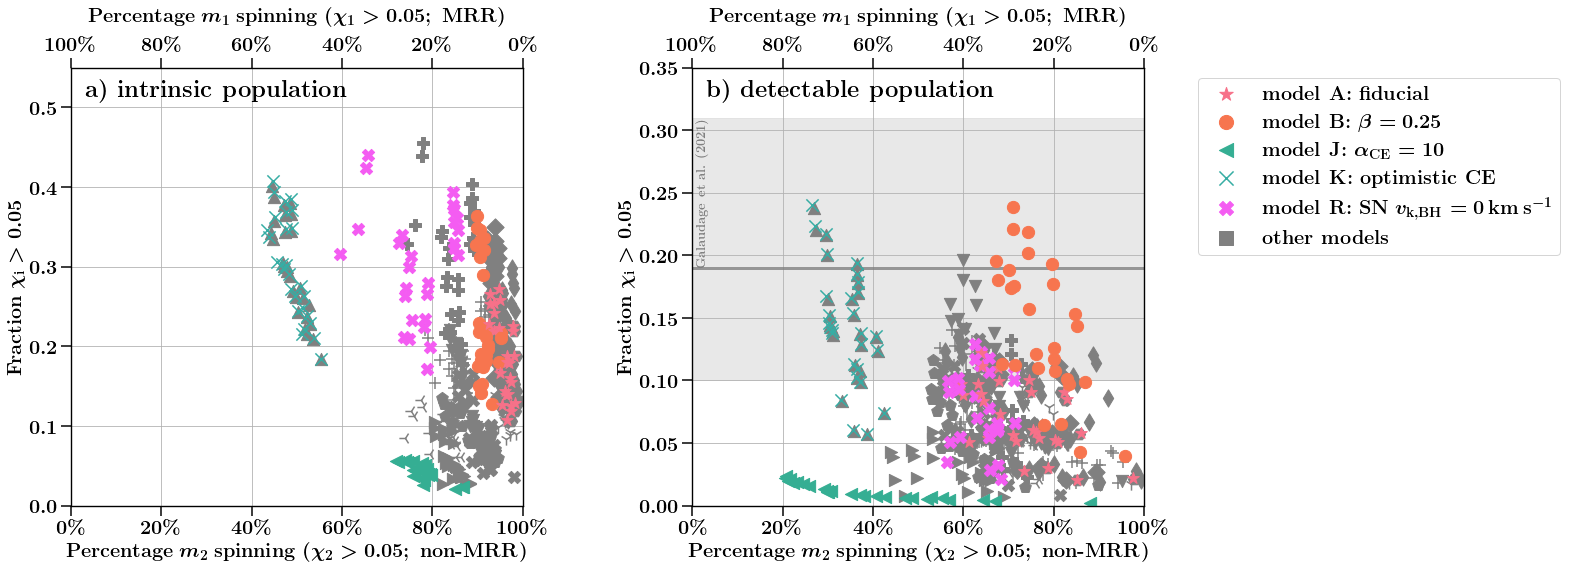

In [12]:



fig, axe = plt.subplots(1,3, figsize=(22,8),\
                           gridspec_kw={"width_ratios":[3, 3, 1.7]})

spin_threshold=0.05

ylims =[0,.55]
axe[0] = plotScatterMRR_spins(axe=axe[0], whichRate='intrinsic', ylims=ylims, spin_threshold=spin_threshold) #, CSVdir=CSVdir))


ylims =[0,.35]
axe[1] = plotScatterMRR_spins(axe=axe[1], whichRate='observed', ylims=ylims, spin_threshold=spin_threshold) #, CSVdir=CSVdir)


axe[2] = plot_legend_scatterFigure(axe=axe[2])


plt.tight_layout()
plt.savefig('./Rate_MRR_spins_' +'panels_' + 'spin_threshold_%s'%spin_threshold  + '.png', dpi=600, transparent=False)
plt.savefig('./Rate_MRR_spins_' +'panels_' + 'spin_threshold_%s'%spin_threshold  + '.pdf', transparent=False) 

plt.show()
plt.close()